In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pylab as plt
import astropy.io.fits as fits
import astropy.units as u

from astropy.coordinates import SkyCoord

from photutils.aperture import CircularAperture
from photutils.aperture import CircularAnnulus
from photutils.aperture import SkyCircularAnnulus
from photutils.psf import BasicPSFPhotometry
from photutils import aperture_photometry

import glob

import os

from matplotlib.colors import LogNorm

# Note: It's all here somewhere, just trust me that if you look hard enough you will eventually find the bit you're looking for.

In [3]:
filepath = './fits/quadRU.fits'

In [4]:
hdul = fits.open(filepath)
# The header says what the 
header = hdul[0].header.copy()
data = hdul[0].data.copy()
hdul.close()

In [5]:
header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1027                                                  
NAXIS2  =                 1023                                                  
EXTEND  =                    T                                                  

In [6]:
plt.style.use('default')

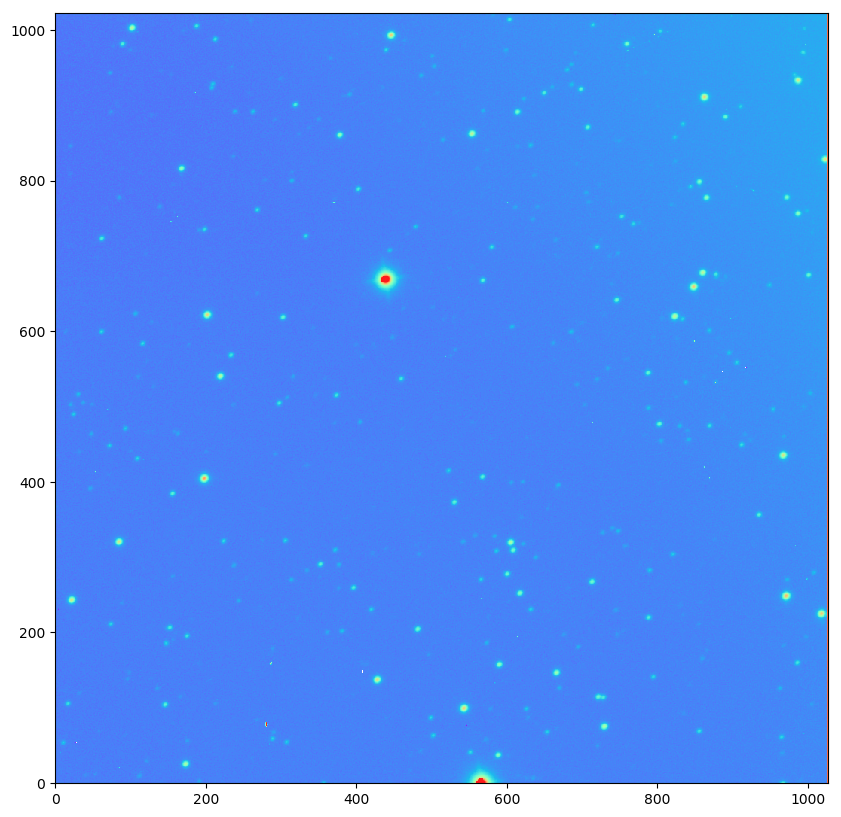

In [7]:
fig,ax = plt.subplots(1,1)                 
fig.set_size_inches(10,10)
fig.set_tight_layout

plt.imshow(data, norm=LogNorm(vmin=100), alpha=0.9, cmap='rainbow', origin='lower');

In [8]:
#star_list = [[459.568, 537.704], [374.032, 515.888], [404.704, 480.032], [522.640, 415.664], [606.880, 607.04], 
             #[567.874, 668.222], [580.374, 713.222], [605.111, 320.188], [608.308, 310.064], [970.620, 249.323]]

star_list = [[446.234, 994.188], [302.891, 619.406], [728.906, 75.812], [202.953, 622.797], [198.875, 406.156], 
             [568, 668], [848.25, 659.5], [859.5, 678.5], [970.562, 249.062], [861.781, 912.219]]

In [9]:
def Aperture_Science(lists, radius):
    # yes it is a long way to go to make an unnecessary function just for a lame joke.
    """We do what we must because we can."""
    glados = CircularAperture(lists, r=radius)
    return glados

In [10]:
circular_aperture_science = Aperture_Science(star_list, 1.0)

In [11]:
ap_pho = aperture_photometry(data, circular_aperture_science, method='subpixel')
ap_pho

id,xcenter,ycenter,aperture_sum
,pix,pix,
int64,float64,float64,float64
1,446.234,994.188,23374.30421765538
2,302.891,619.406,3896.7261089783033
3,728.906,75.812,10889.34177889836
4,202.953,622.797,19075.76714462282
5,198.875,406.156,27586.766247816326
6,568.0,668.0,3020.946920043102
7,848.25,659.5,24270.542455133073
8,859.5,678.5,13623.362347522496


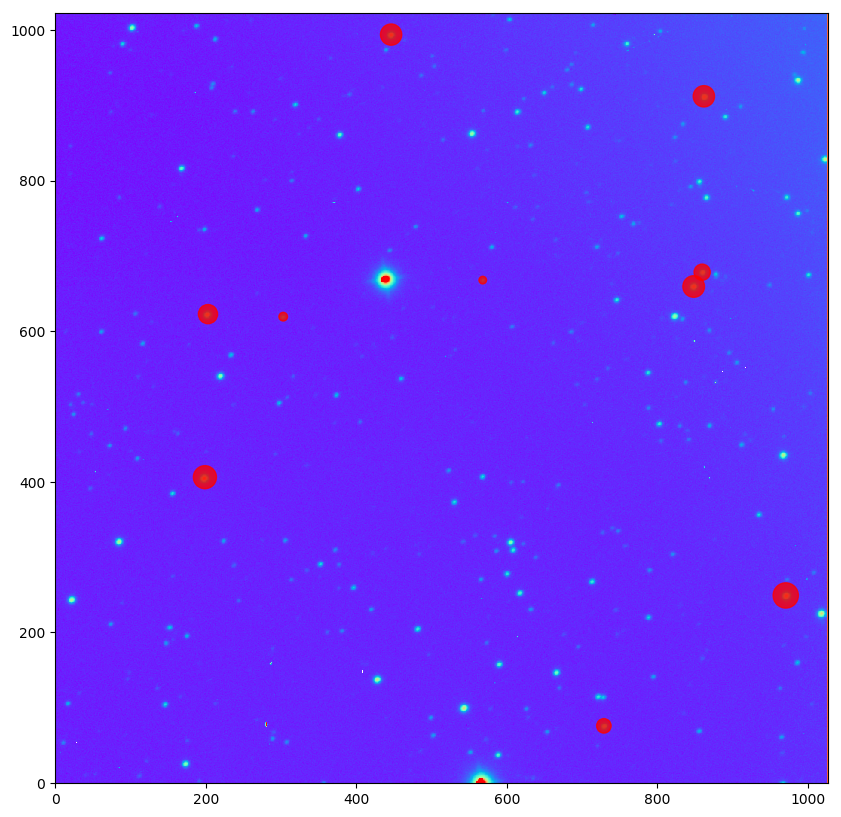

In [12]:
fig,ax = plt.subplots(1,1)                 
fig.set_size_inches(10,10)
fig.set_tight_layout

plt.imshow(data, norm=LogNorm(vmin=200), alpha=1.0, cmap='rainbow', origin='lower')

# First attempt at getting it to work.

plt.scatter(ap_pho['xcenter'], ap_pho['ycenter'], ap_pho['aperture_sum']/100, alpha=0.8, color='r');

In [13]:
count = []
for i in ap_pho:
    count_a = i['aperture_sum']
    count_per_area = count_a / (np.pi * 1.0**2) # counts / pixel squared
    count.append(count_per_area)
print(count)

[7440.272115147182, 1240.3664442382892, 3466.185142257534, 6072.005268673383, 8781.140424521252, 961.5972702861928, 7725.553606512268, 4336.450918280425, 10519.292965710529, 7515.068704791563]


In [14]:
head_crab = CircularAnnulus(star_list, r_in=1.0, r_out=5.0)

In [15]:
# when I come back to this in a day or two I'm not going to remember what any of these names mean but that's
# okay because head_crab_science is way more interesting than data_annulus or something. One of these days I'm
# going to import matplotlib.pylab as fish_stick or something.

head_crab_science = aperture_photometry(data, head_crab, method='subpixel')
print(head_crab_science)

 id xcenter ycenter    aperture_sum   
      pix     pix                     
--- ------- ------- ------------------
  1 446.234 994.188 199680.72662548226
  2 302.891 619.406 43824.558769692216
  3 728.906  75.812 100131.32370026116
  4 202.953 622.797 183495.67911487355
  5 198.875 406.156 336210.55099672807
  6   568.0   668.0  39640.09908550099
  7  848.25   659.5 212422.87924630722
  8   859.5   678.5 113716.98110075027
  9 970.562 249.062   289760.840593135
 10 861.781 912.219 207693.26320912063


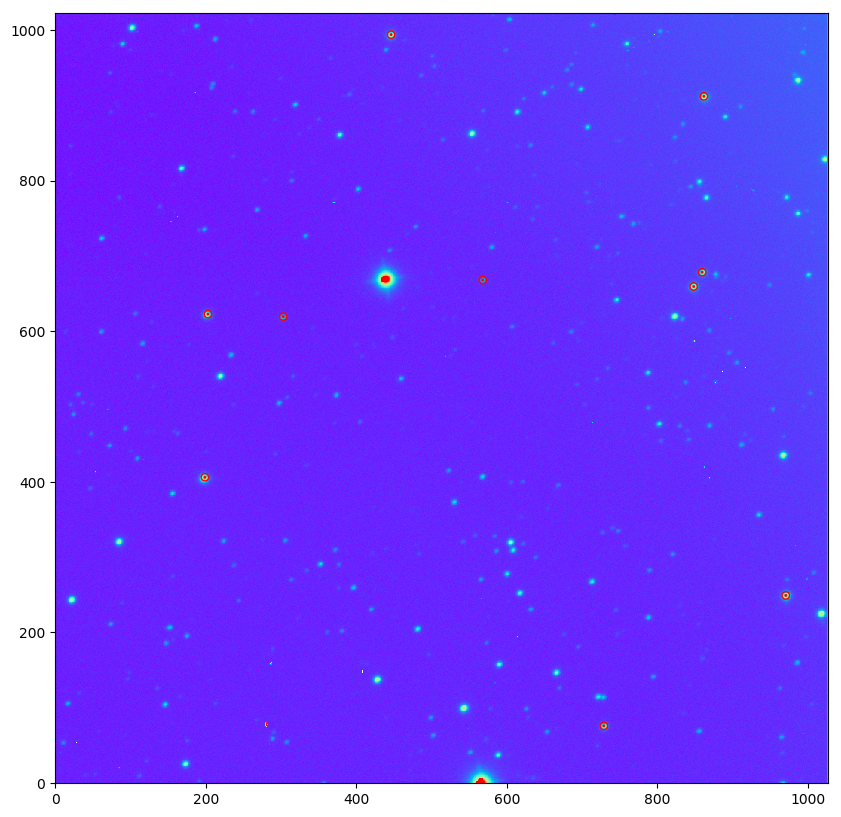

In [16]:
fig,ax = plt.subplots(1,1)                 
fig.set_size_inches(10,10)
fig.set_tight_layout

plt.imshow(data, norm=LogNorm(vmin=200), alpha=1.0, cmap='rainbow', origin='lower')
CircularAnnulus.plot(head_crab, color="r");

In [17]:
counts = []
for i in head_crab_science:
    count_b = i['aperture_sum']
    count_per_area = count_b / (np.pi * 15**2)
    counts.append(count_per_area)
print(counts)

[282.4904416233506, 61.99906806238033, 141.6568455576108, 259.59328326343456, 475.6406320958136, 56.079268569866684, 300.51690006988963, 160.8766191615293, 409.9277341765347, 293.82586210326787]


In [18]:
# sky subtraction:

sky = []

for i in counts:
    sky.append(i*np.pi*1.0**2) # counts/area * area
print(sky)

[887.4698961132545, 194.77581675418762, 445.02810533449406, 815.5363516216602, 1494.2691155410137, 176.17821815778217, 944.1016855391432, 505.40880489222343, 1287.8259581917112, 923.0811698183139]


In [19]:
sub_count = []

for i in ap_pho:
    sub_count.append(i['aperture_sum'])

skyless_suns = np.array(sub_count) - np.array(sky)
skyless_suns

# yay!

array([22486.83432154,  3701.95029222, 10444.31367356, 18260.230793  ,
       26092.49713228,  2844.76870189, 23326.44076959, 13117.95354263,
       31759.50754384, 22686.20346438])

In [20]:
plt.style.use('ggplot')

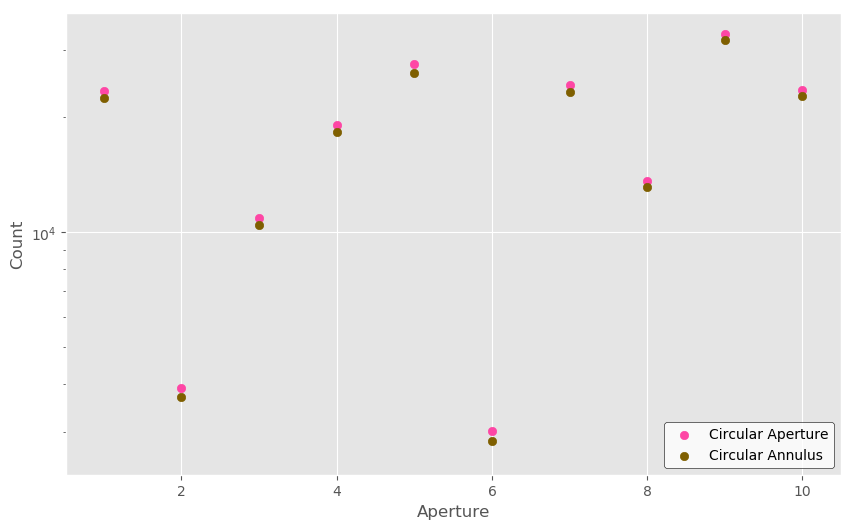

In [22]:
fig,ax = plt.subplots(1,1)                 
fig.set_size_inches(10,6)
fig.set_tight_layout

set1 = ax.scatter(ap_pho['id'], sub_count, color = 'xkcd:Barbie Pink') # Imagination, life is your creation!
set2 = ax.scatter(ap_pho['id'], skyless_suns, color = 'xkcd:shit')

ax.set_xlabel('Aperture')
ax.set_ylabel('Count')
ax.legend((set1, set2), ('Circular Aperture', 'Circular Annulus'), loc="lower right", fancybox=True, 
          facecolor = 'w', edgecolor = 'black')
ax.set_yscale('log');

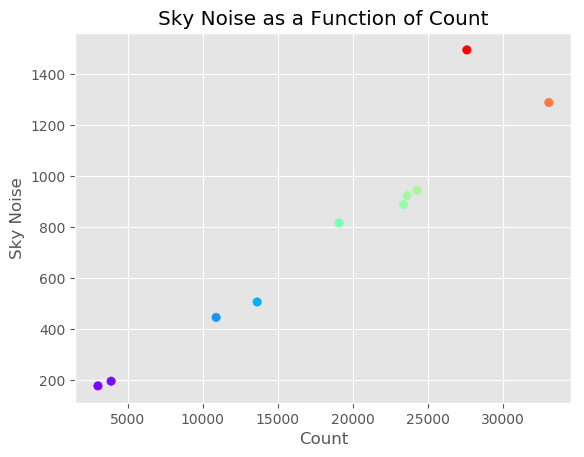

In [23]:
plt.scatter(sub_count, sky, c = sky, cmap = 'rainbow')
plt.xlabel('Count')
plt.ylabel('Sky Noise')
plt.title('Sky Noise as a Function of Count');

In [24]:
# Maybe that makes sense?

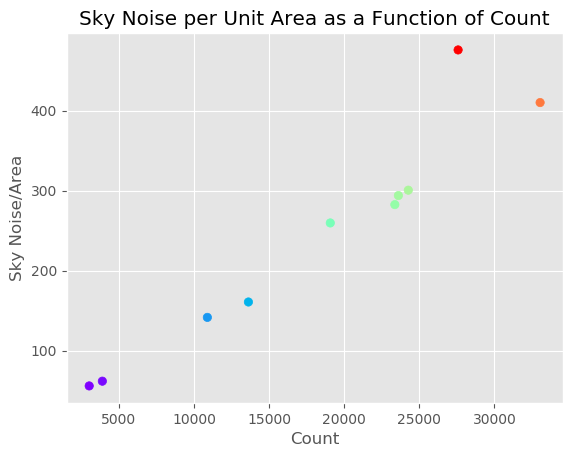

In [25]:
plt.scatter(sub_count, counts, c = sky, cmap = 'rainbow')
plt.xlabel('Count')
plt.ylabel('Sky Noise/Area')
plt.title('Sky Noise per Unit Area as a Function of Count');

In [26]:
# given that this is still a linear (except for the data point that isn't but screw that data point) function of
# count, I probably didn't make these apertures and annuli perfectly. Whatever.

In [27]:
# out of curiosity:

ap_pho1 = aperture_photometry(data, circular_aperture_science, method='exact')
ap_pho1

id,xcenter,ycenter,aperture_sum
,pix,pix,
int64,float64,float64,float64
1,446.234,994.188,23923.03992760815
2,302.891,619.406,3839.3868804252
3,728.906,75.812,10717.532891295114
4,202.953,622.797,19191.526935997856
5,198.875,406.156,27266.470929463663
6,568.0,668.0,3406.4386970573914
7,848.25,659.5,23880.803545624683
8,859.5,678.5,13374.704708802648


In [28]:
exact_count = []

for i in ap_pho1:
    exact_count.append(i['aperture_sum'])

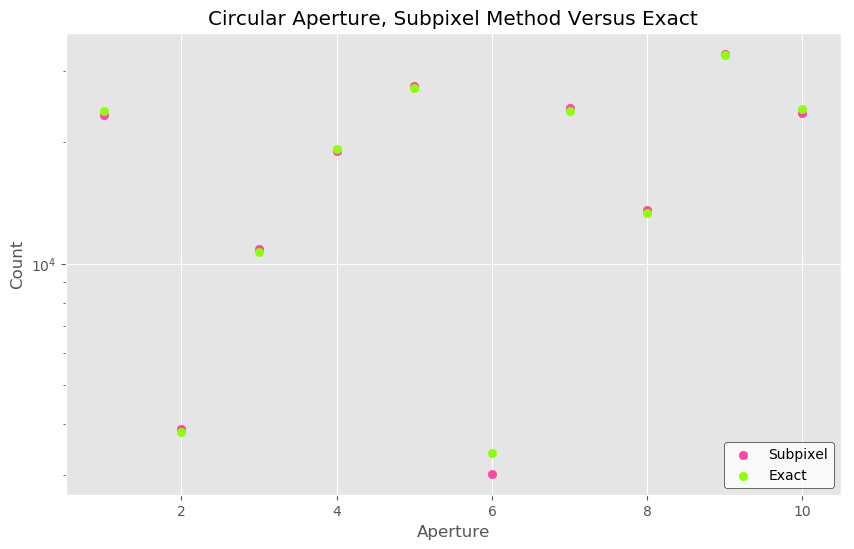

In [29]:
# A super important contest between methods to see which one is better that also serves as another
# possible plot for question whatever it was.

fig,ax = plt.subplots(1,1)                 
fig.set_size_inches(10,6)
fig.set_tight_layout

set1 = ax.scatter(ap_pho['id'], sub_count, color = 'xkcd:Barbie Pink')
set2 = ax.scatter(ap_pho['id'], exact_count, color = 'xkcd:Acid Green')
ax.set_xlabel('Aperture')
ax.set_ylabel('Count')
ax.legend((set1, set2), ('Subpixel', 'Exact'), loc="lower right", fancybox=True, 
          facecolor = 'w', edgecolor = 'black')
ax.set_title('Circular Aperture, Subpixel Method Versus Exact')
ax.set_yscale('log');

## PSF Bit:

In [30]:
# I have no idea what I'm doing:

In [31]:
# changing from default example image to the fits data like a computer skyence expret:

image = data

In [32]:
from matplotlib import rcParams
from photutils.detection import IRAFStarFinder
from photutils.psf import IntegratedGaussianPRF, DAOGroup
from photutils.background import MMMBackground, MADStdBackgroundRMS
from astropy.modeling.fitting import LevMarLSQFitter
from astropy.stats import gaussian_sigma_to_fwhm

In [33]:
plt.style.use('default')

In [34]:
bkgrms = MADStdBackgroundRMS()
std = bkgrms(image)
sigma_psf = 2.0
iraffind = IRAFStarFinder(threshold=1.0*std,
                          fwhm=sigma_psf*gaussian_sigma_to_fwhm,
                          minsep_fwhm=0.01, roundhi=5.0, roundlo=-5.0,
                          sharplo=0.0, sharphi=2.0)
daogroup = DAOGroup(2.0*sigma_psf*gaussian_sigma_to_fwhm)
mmm_bkg = MMMBackground()
fitter = LevMarLSQFitter()
psf_model = IntegratedGaussianPRF(sigma=sigma_psf)
from photutils.psf import IterativelySubtractedPSFPhotometry

In [35]:
psf_model.x_0.fixed = True
psf_model.y_0.fixed = True


from astropy.table import Table

sources = Table()
sources['x_mean'] = [446.234, 302.891, 728.906, 202.953, 198.875, 
             568, 848.25, 859.5, 970.562, 861.781]
sources['y_mean'] = [994.188, 619.406, 75.812, 622.797, 406.156, 
             668, 659.5, 678.5, 249.062, 912.219]

pos = Table(names=['x_0', 'y_0'], data=[sources['x_mean'], sources['y_mean']])

In [36]:
photometry = BasicPSFPhotometry(group_maker=daogroup,
                                bkg_estimator=mmm_bkg,
                                psf_model=psf_model,
                                fitter=LevMarLSQFitter(),
                                fitshape=(11,11))
result_tab = photometry(image=image, init_guesses=pos)
residual_image = photometry.get_residual_image()

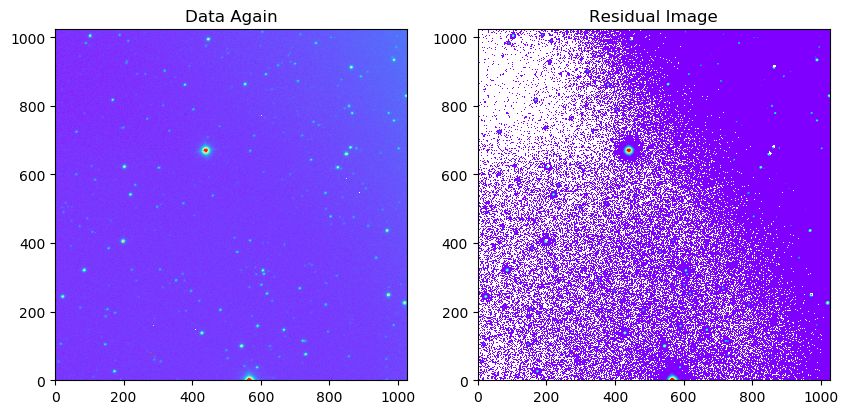

In [37]:
fig,ax = plt.subplots(1,2)                 
fig.set_size_inches(10,10)
ax[0].imshow(image, norm=LogNorm(vmin=200), alpha=0.9, cmap='rainbow', origin='lower')
ax[0].set_title('Data Again')

ax[1].imshow(residual_image, norm=LogNorm(vmin=200), alpha=1.0, cmap='rainbow', aspect=1,
           interpolation='nearest', origin='lower')
ax[1].set_title('Residual Image');
# perfect!

## Messing around with cleaning the image up (just my own experimentation, this section isn't actually directly related to the activity):

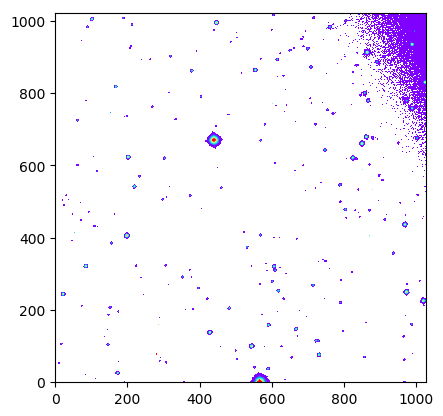

In [38]:
crude_sky_diff = image-image.mean()

plt.imshow(crude_sky_diff, norm=LogNorm(vmin=200), alpha=1.0, cmap='rainbow', origin='lower');

In [39]:
from astropy import stats

In [40]:
clip_star = stats.sigma_clip(data, sigma=5, iters=5)

In [41]:
copy_data = np.copy(data)

copy_data[~clip_star.mask] = data.min()

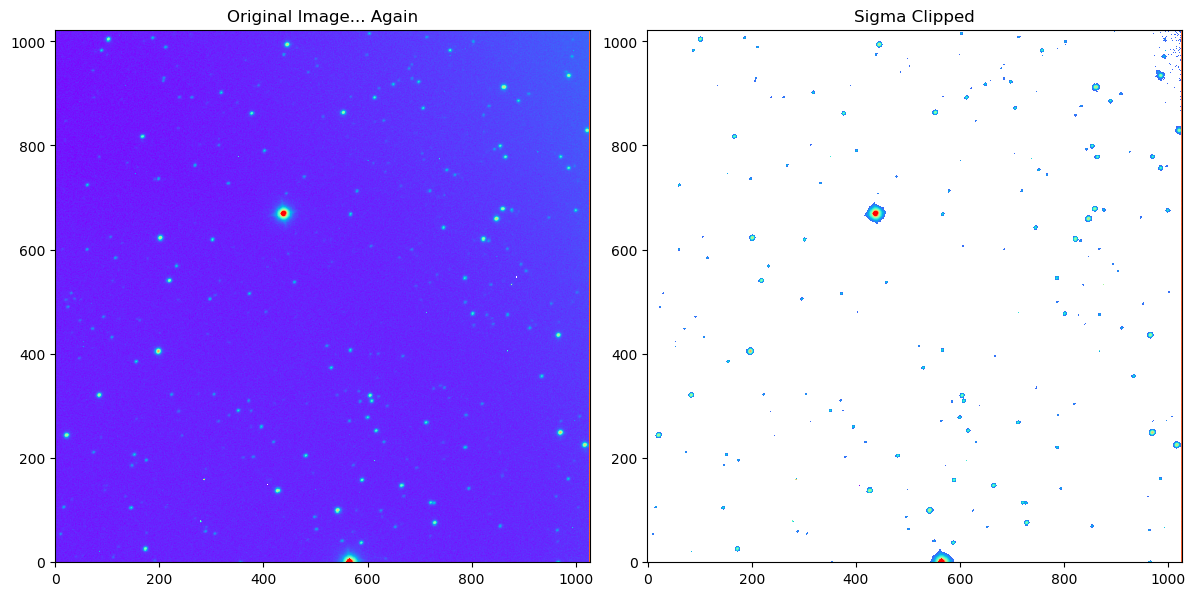

In [42]:
fig, ax = plt.subplots(1,2)

fig.set_size_inches(12,6)

fig.tight_layout()

ax[0].imshow(data, norm=LogNorm(vmin=200), origin='lower', cmap='rainbow')
ax[1].imshow(copy_data, norm=LogNorm(vmin=200), origin='lower', cmap='rainbow')
ax[0].set_title('Original Image... Again')
ax[1].set_title('Sigma Clipped');

## Okay back to PSF now

In [43]:
result_tab

x_0,y_0,flux_0,id,group_id,x_fit,y_fit,flux_fit,flux_unc
float64,float64,float64,int64,int64,float64,float64,float64,float64
446.234,994.188,196603.80488247902,1,1,446.234,994.188,206569.06750760096,8693.39961104402
302.891,619.406,26505.605003607503,2,2,302.891,619.406,27505.70192307186,1196.6049265309828
728.906,75.812,87939.2289882063,3,3,728.906,75.812,90737.50612756559,3308.199493164737
202.953,622.797,175691.2337275841,4,4,202.953,622.797,174654.60766581466,10355.058748390491
198.875,406.156,327638.6014249521,5,5,198.875,406.156,299717.0704342313,25438.44708277621
568.0,668.0,21729.532523400903,6,6,568.0,668.0,22847.741266989186,779.3878822226491
848.25,659.5,208625.92735342527,7,7,848.25,659.5,212354.58805732368,9981.910533620987
859.5,678.5,103013.15764127918,8,8,859.5,678.5,108129.57134738,3683.0387791391486
970.562,249.062,292444.61153126665,9,9,970.562,249.062,299065.3963841749,11886.746775617783


In [44]:
plt.style.use('ggplot')

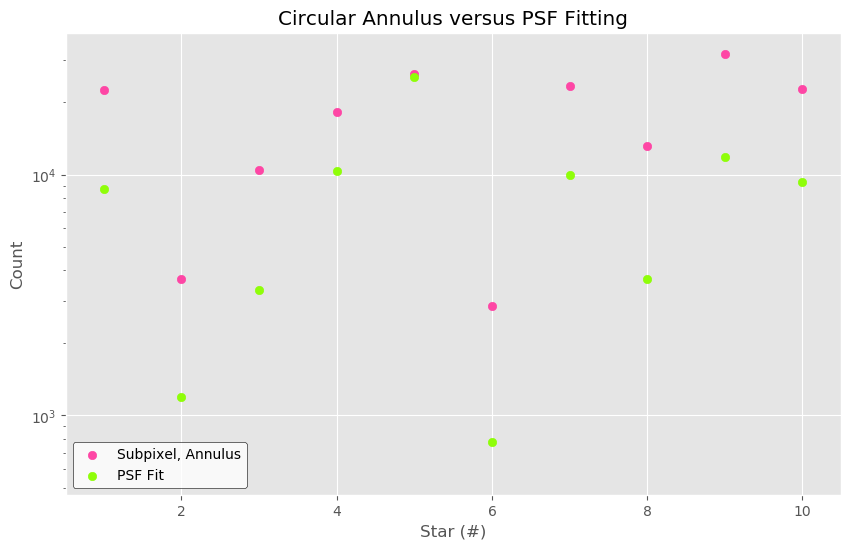

In [45]:
fig,ax = plt.subplots(1,1)                 
fig.set_size_inches(10,6)
fig.set_tight_layout

set1 = ax.scatter(ap_pho['id'], skyless_suns, color = 'xkcd:Barbie Pink') # Come on Barbie, let's go party!
set2 = ax.scatter(result_tab['id'], result_tab['flux_unc'], color = 'xkcd:Acid Green')
ax.set_xlabel('Star (#)')
ax.set_ylabel('Count')
ax.legend((set1, set2), ('Subpixel, Annulus', 'PSF Fit'), loc="lower left", fancybox=True, 
          facecolor = 'w', edgecolor = 'black')
ax.set_title('Circular Annulus versus PSF Fitting')
ax.set_yscale('log');

### Discussion of above plot: As can be seen, PSF-fitting consistently produces a (usually much) lower value. This could very well be down to user error in either the aperature/annulus segment or the the PSF-fit stage (or somewhere else!). However, while keeping that in mind, it would seem that PSF-fitting produces a less noisy, more accurate count.

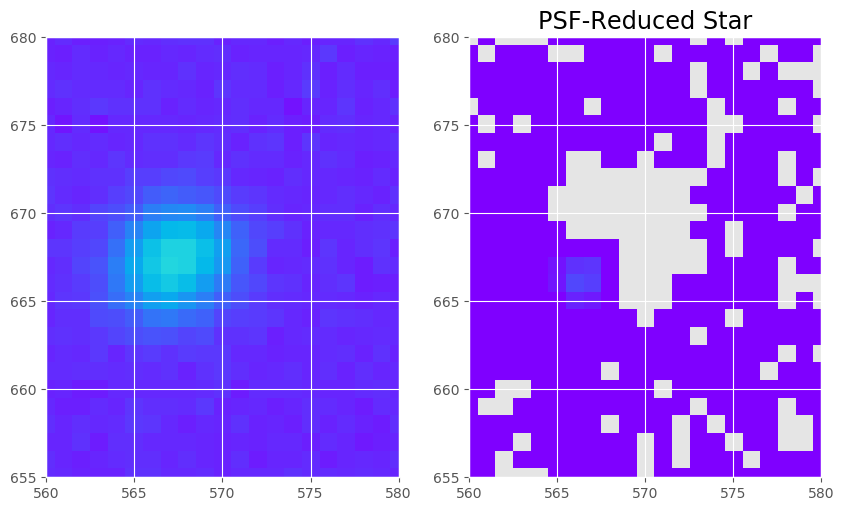

In [46]:
fig,ax = plt.subplots(1,2)
fig.set_size_inches(10,10)

rcParams['font.size'] = 12

ax[0].axis((560,580,655,680))
ax[1].axis((560,580,655,680))

ax[0].imshow(image, cmap='rainbow', aspect=1, norm=LogNorm(vmin=200), interpolation='nearest',origin='lower') 
ax[1].imshow(residual_image, cmap='rainbow', aspect=1, norm=LogNorm(vmin=200), interpolation='nearest',origin='lower')
plt.title('PSF-Reduced Star');

# So yes that possibly could be better, but moving on to:

#  Bias frame stuff!

In [47]:
directory = './Wolf1346/'

In [48]:
bias_filepath = glob.glob(os.path.join(directory, 'bias*.fits'))
print(bias_filepath[0:5])

['./Wolf1346/bias.0006.fits', './Wolf1346/bias.0007.fits', './Wolf1346/bias.0008.fits', './Wolf1346/bias.0009.fits', './Wolf1346/bias.0010.fits']


In [49]:
# looks good, now to find the average count of the bias frames:

bias_avgs = []

for file in bias_filepath:
    bdata = fits.getdata(file)
    bias_avgs.append(np.mean(bdata))

# average count of biases individually:    

print(bias_avgs)

# average master bias:

super_bias = np.mean(bias_avgs)

print(super_bias)

[351.70354319927594, 351.3568139518693, 351.65315007774245, 351.7383458262746, 351.675116381611, 351.7116537095913, 351.40129446984287, 351.67762200923625, 351.6943257292706, 351.5752312547864, 351.4999043883874]
351.60790918162616


# Overscan business:

In [50]:
hdu2 = fits.open(directory+'flat.0036.fits')

data2 = hdu2[0].data

hdu2.close()

In [51]:
plt.style.use('default')

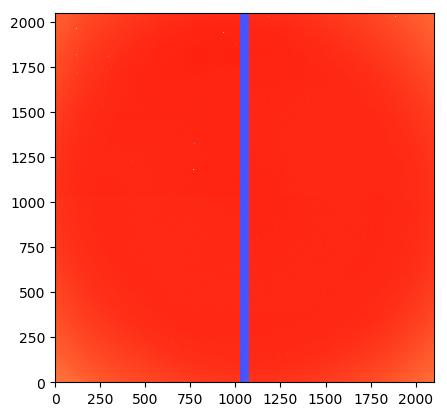

In [52]:
plt.imshow(data2, norm=LogNorm(vmin=200), cmap='rainbow', origin='lower');

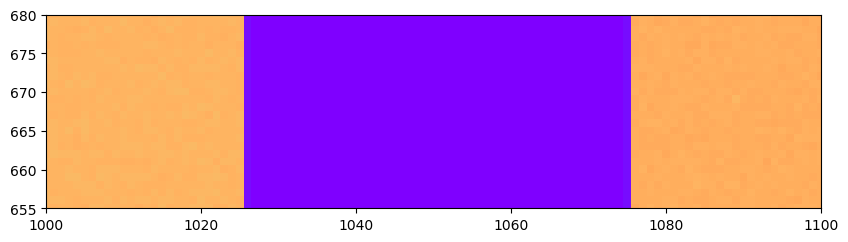

In [53]:
from matplotlib import rcParams

fig,ax=plt.subplots(figsize=(10,10))
rcParams['font.size'] = 12
plt.axis((1000,1100,655,680))

plt.imshow(data2, cmap='rainbow', aspect=1, interpolation='nearest',origin='lower');

# Flat-Field-Filter-Finding:

In [54]:
falts_dir = glob.glob(os.path.join(directory, 'flat*.fits'))

In [55]:
list_list = []

for file in falts_dir:
    
    hdu = fits.open(file)
    header = hdu[0].header.copy()
    list_list.append(os.path.basename(file))
    list_list.append(header['FILTER'])
      
print(list_list)

['flat.0005.fits', 'Wash M', 'flat.0006.fits', 'Wash M', 'flat.0007.fits', 'Wash M', 'flat.0008.fits', 'Wash M', 'flat.0009.fits', 'Wash M', 'flat.0010.fits', 'Wash M', 'flat.0011.fits', 'Wash M', 'flat.0012.fits', 'Wash M', 'flat.0013.fits', 'Wash M', 'flat.0014.fits', 'Wash M', 'flat.0015.fits', 'Wash M', 'flat.0016.fits', 'Wash M', 'flat.0017.fits', 'J-C Rc', 'flat.0018.fits', 'J-C Rc', 'flat.0019.fits', 'J-C Rc', 'flat.0020.fits', 'J-C Rc', 'flat.0021.fits', 'J-C Rc', 'flat.0022.fits', 'J-C Rc', 'flat.0023.fits', 'J-C Rc', 'flat.0024.fits', 'J-C Rc', 'flat.0025.fits', 'J-C Rc', 'flat.0026.fits', 'J-C Rc', 'flat.0027.fits', 'J-C Rc', 'flat.0028.fits', 'J-C Rc', 'flat.0029.fits', 'J-C Rc', 'flat.0030.fits', 'J-C Rc', 'flat.0031.fits', 'J-C Rc', 'flat.0032.fits', 'J-C Rc', 'flat.0033.fits', 'J-C Rc', 'flat.0034.fits', 'J-C Rc', 'flat.0035.fits', 'J-C Rc', 'flat.0036.fits', 'J-C Rc', 'flat.0037.fits', 'J-C Rc', 'flat.0038.fits', 'J-C Rc', 'flat.0039.fits', 'J-C Rc', 'flat.0040.fits', '